In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
data = pd.read_excel("https://github.com/Bhaveshpanse29/Appointment-Scheduler-project/blob/main/final_data.xlsx?raw=true")

In [2]:
data

,Sr_No.,Patient ID,Agent ID,pincode,patient location,Latitudes and Longitudes (Patient),Latitudes and Longitudes (Agent),Latitudes and Longitudes (Diagnostic Center),Diagnostic Centers,Time slot,...,Test Booking Date,Test Booking Time HH:MM,Test name,Sample,Way Of Storage Of Sample,Sample Collection Date,Time For Sample Collection MM,Time Agent-Pathlab sec,Agent Arrival Time (range) HH:MM,Exact Arrival Time MM
0,0,MD1001,26,500019,Serilingampalle (M),"17.480944, 78.321500","17.476422, 78.327109","17.494695, 78.344071",Medquest Diagnostics Center,06:00 to 21:00 (Home),...,2022-01-01,12:04:00,Vitamin B-12,Blood,Vaccum blood collection tube,2022-01-02,11,271.3,09:05 to 09:55,34
1,1,MD1002,40,500084,Serilingampalle (M),"17.482750, 78.340586","17.473802, 78.335612","17.494695, 78.344071",Medquest Diagnostics Center,19:00 to 22:00 (working person),...,2022-01-02,11:12:00,HbA1c,Blood,Vaccum blood collection tube,2022-01-03,10,249.0,19:05 to 19:55,39
2,2,MD1003,19,502032,Ramachandrapuram,"17.518403, 78.310165","17.519385, 78.306378","17.494695, 78.344071",Medquest Diagnostics Center,06:00 to 18:00 (Collect at work place),...,2022-01-03,12:24:00,CBC,Blood,Vaccum blood collection tube,2022-01-04,12,484.9,14:05 to 14:55,24
3,3,MD1004,45,500049,Miyapur,"17.511200, 78.357393","17.488280, 78.384516","17.494695, 78.344071",Medquest Diagnostics Center,19:00 to 22:00 (working person),...,2022-01-04,13:38:00,Vitamin D-25Hydroxy,Blood,Vaccum blood collection tube,2022-01-05,7,434.8,21:05 to 21:55,39
4,4,MD1005,12,500090,Nizampet,"17.503342, 78.384344","17.513819, 78.360140","17.494695, 78.344071",Medquest Diagnostics Center,06:00 to 18:00 (Collect at work place),...,2022-01-05,16:01:00,TSH,Blood,Vaccum blood collection tube,2022-01-06,10,272.5,13:05 to 13:55,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1299,MFD1124,16,500090,Pragathi Nagar,"17.524927, 78.401350","17.522379, 78.405695","17.486824, 78.390131",Medifine Diagnostic Center,19:00 to 22:00 (working person),...,2022-05-04,06:45:00,Vitamin B-12,Blood,Vaccum blood collection tube,2022-05-06,16,428.4,21:05 to 21:55,34
1300,1300,MFD1125,27,500072,Jagathgiri Gutta,"17.502552, 78.424311","17.491488, 78.403358","17.486824, 78.390131",Medifine Diagnostic Center,06:00 to 18:00 (Collect at work place),...,2022-05-05,21:15:00,Vitamin D-25Hydroxy,Blood,Vaccum blood collection tube,2022-05-07,7,149.5,11:05 to 11:55,39
1301,1301,MFD1126,22,500072,Kukatpally,"17.478511, 78.400408","17.495904, 78.404999","17.486824, 78.390131",Medifine Diagnostic Center,06:00 to 21:00 (Home),...,2022-05-06,19:35:00,TSH,Blood,Vaccum blood collection tube,2022-05-08,5,187.2,10:05 to 10:55,39
1302,1302,PDC1117,31,500032,Gachibowli,"17.449839, 78.351878","17.438948, 78.357365","17.423566, 78.380393",Pronto Diagnostics Center,19:00 to 22:00 (working person),...,2022-05-07,13:45:00,Lipid Profile,Blood,Vaccum blood collection tube,2022-05-09,9,298.2,19:05 to 19:55,39


In [3]:
data.columns

Index(['Sr_No.', 'Patient ID', 'Agent ID', 'pincode', 'patient location',
       'Latitudes and Longitudes (Patient)',
       'Latitudes and Longitudes (Agent)',
       'Latitudes and Longitudes (Diagnostic Center)', 'Diagnostic Centers',
       'Time slot', 'shortest distance Agent-Pathlab(m)',
       'shortest distance Patient-Pathlab(m)',
       'shortest distance Patient-Agent(m)', 'Availabilty time (Patient)',
       'Age', 'Gender', 'Test Booking Date', 'Test Booking Time HH:MM',
       'Test name', 'Sample', 'Way Of Storage Of Sample',
       'Sample Collection Date', ' Time For Sample Collection MM',
       'Time Agent-Pathlab sec', 'Agent Arrival Time (range) HH:MM',
       'Exact Arrival Time MM'],
      dtype='object')

In [4]:
df = data[[ 
    'Patient ID',
    'patient location',
    'Latitudes and Longitudes (Patient)',
    'Test name',
    'Age',
    'Gender',
    'shortest distance Patient-Pathlab(m)',
    'Diagnostic Centers',
    'Availabilty time (Patient)'
]]

# Preprocessing

In [5]:
Latitudes = []
Longitudes = []
for cor in df['Latitudes and Longitudes (Patient)']:
  Latitudes.append(float(cor[:cor.index(',')]))
  try:
    Longitudes.append(float(cor[cor.index(',') + 2:]))
  except:
      print(cor[cor.index(',') + 5:])

df['Latitudes'] = Latitudes
df['Longitudes'] = Longitudes
df = df.drop(['Latitudes and Longitudes (Patient)'],axis = 1)

<ipython-input-5-b010797a119e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Latitudes'] = Latitudes
<ipython-input-5-b010797a119e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitudes'] = Longitudes


In [6]:
df

,Patient ID,patient location,Test name,Age,Gender,shortest distance Patient-Pathlab(m),Diagnostic Centers,Availabilty time (Patient),Latitudes,Longitudes
0,MD1001,Serilingampalle (M),Vitamin B-12,37,Female,2840,Medquest Diagnostics Center,09:00 to 10:00,17.480944,78.321500
1,MD1002,Serilingampalle (M),HbA1c,29,Male,1378,Medquest Diagnostics Center,19:00 to 20:00,17.482750,78.340586
2,MD1003,Ramachandrapuram,CBC,33,Male,4458,Medquest Diagnostics Center,14:00 to 15:00,17.518403,78.310165
3,MD1004,Miyapur,Vitamin D-25Hydroxy,62,Female,2316,Medquest Diagnostics Center,21:00 to 22:00,17.511200,78.357393
4,MD1005,Nizampet,TSH,80,Male,4377,Medquest Diagnostics Center,13:00 to 14:00,17.503342,78.384344
...,...,...,...,...,...,...,...,...,...,...
1299,MFD1124,Pragathi Nagar,Vitamin B-12,17,Female,4400,Medifine Diagnostic Center,21:00 to 22:00,17.524927,78.401350
1300,MFD1125,Jagathgiri Gutta,Vitamin D-25Hydroxy,52,Female,4024,Medifine Diagnostic Center,11:00 to 12:00,17.502552,78.424311
1301,MFD1126,Kukatpally,TSH,37,Male,1429,Medifine Diagnostic Center,10:00 to 11:00,17.478511,78.400408
1302,PDC1117,Gachibowli,Lipid Profile,28,Female,4205,Pronto Diagnostics Center,19:00 to 20:00,17.449839,78.351878


In [7]:
df = df.drop_duplicates(ignore_index = True)
len(df)

1304

In [8]:
df['Diagnostic Centers'].value_counts()

Medquest Diagnostics Center    163
Lucid Medical Diagnostics      137
Sri Sai Diagnostic Center      134
Medifine Diagnostic Center     127
Tesla Diagnostics              127
Diamond Diagnostic Center      124
Apollo Diagnostics             123
Vijaya Diagnostic Center       119
Vivaa Diagnostic Center        119
Pronto Diagnostics Center      116
Vijaya Diagonstic Center         5
Medquest Diagnostics             5
Viva Diagnostic                  3
Pronto Diagnostics               2
Name: Diagnostic Centers, dtype: int64

In [9]:
df = df[df['Diagnostic Centers'] != 'Vijaya Diagonstic Center']
df = df[df['Diagnostic Centers'] != 'Medquest Diagnostics']
df = df[df['Diagnostic Centers'] != 'Viva Diagnostic']
df = df[df['Diagnostic Centers'] != 'Pronto Diagnostics'] 
df

,Patient ID,patient location,Test name,Age,Gender,shortest distance Patient-Pathlab(m),Diagnostic Centers,Availabilty time (Patient),Latitudes,Longitudes
0,MD1001,Serilingampalle (M),Vitamin B-12,37,Female,2840,Medquest Diagnostics Center,09:00 to 10:00,17.480944,78.321500
1,MD1002,Serilingampalle (M),HbA1c,29,Male,1378,Medquest Diagnostics Center,19:00 to 20:00,17.482750,78.340586
2,MD1003,Ramachandrapuram,CBC,33,Male,4458,Medquest Diagnostics Center,14:00 to 15:00,17.518403,78.310165
3,MD1004,Miyapur,Vitamin D-25Hydroxy,62,Female,2316,Medquest Diagnostics Center,21:00 to 22:00,17.511200,78.357393
4,MD1005,Nizampet,TSH,80,Male,4377,Medquest Diagnostics Center,13:00 to 14:00,17.503342,78.384344
...,...,...,...,...,...,...,...,...,...,...
1299,MFD1124,Pragathi Nagar,Vitamin B-12,17,Female,4400,Medifine Diagnostic Center,21:00 to 22:00,17.524927,78.401350
1300,MFD1125,Jagathgiri Gutta,Vitamin D-25Hydroxy,52,Female,4024,Medifine Diagnostic Center,11:00 to 12:00,17.502552,78.424311
1301,MFD1126,Kukatpally,TSH,37,Male,1429,Medifine Diagnostic Center,10:00 to 11:00,17.478511,78.400408
1302,PDC1117,Gachibowli,Lipid Profile,28,Female,4205,Pronto Diagnostics Center,19:00 to 20:00,17.449839,78.351878


In [10]:
from sklearn.preprocessing import LabelEncoder

labp  = LabelEncoder()
labt  = LabelEncoder()
labg  = LabelEncoder()
labd  = LabelEncoder()

df['patient location'] = labp.fit_transform(df['patient location'])
df['Test name'] = labt.fit_transform(df['Test name'])
df['Gender'] = labg.fit_transform(df['Gender'])
df['Diagnostic Centers'] = labd.fit_transform(df['Diagnostic Centers'])

In [11]:
df.head()

,Patient ID,patient location,Test name,Age,Gender,shortest distance Patient-Pathlab(m),Diagnostic Centers,Availabilty time (Patient),Latitudes,Longitudes
0,MD1001,233,8,37,0,2840,4,09:00 to 10:00,17.480944,78.321500
1,MD1002,233,4,29,1,1378,4,19:00 to 20:00,17.482750,78.340586
2,MD1003,214,0,33,1,4458,4,14:00 to 15:00,17.518403,78.310165
3,MD1004,156,9,62,0,2316,4,21:00 to 22:00,17.511200,78.357393
4,MD1005,184,7,80,1,4377,4,13:00 to 14:00,17.503342,78.384344


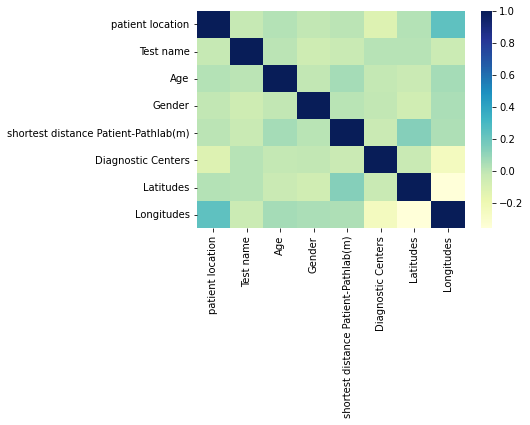

In [12]:
import seaborn as sb

dataplot = sb.heatmap(df.corr(), cmap="YlGnBu")

# Classification

## Split

In [13]:
target = df['Diagnostic Centers']
records = df.drop(['Diagnostic Centers','Patient ID','Availabilty time (Patient)'],axis = 1)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()
scalar.fit(records)
scaled = scalar.transform(records)

In [15]:
records.head()

,patient location,Test name,Age,Gender,shortest distance Patient-Pathlab(m),Latitudes,Longitudes
0,233,8,37,0,2840,17.480944,78.321500
1,233,4,29,1,1378,17.482750,78.340586
2,214,0,33,1,4458,17.518403,78.310165
3,156,9,62,0,2316,17.511200,78.357393
4,184,7,80,1,4377,17.503342,78.384344


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(records, target, test_size=0.30, random_state=42)

## Tpot

In [17]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 5.2 MB/s 
     |████████████████████████████████| 139 kB 67.2 MB/s 
     |████████████████████████████████| 193.6 MB 76 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11953 sha256=931b61f10ec06724aa8a81faf885174bdb4336495458868892b6d0c1cbe0fb35
  Stored in directory: /root/.cache/pip/wheels/a8/bb/8f/6b9328d23c2dcedbfeb8498b9f650d55d463089e3b8fc0bfb2
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
# import tpot
# from sklearn.model_selection import RepeatedStratifiedKFold
# from tpot import TPOTClassifier

In [ ]:
# # define evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=3, random_state=1)
# # define search
# model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1)
# # perform the search
# model.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.588686969361388

Generation 2 - Current best internal CV score: 0.5897918050941305

Generation 3 - Current best internal CV score: 0.5912325581395349

Generation 4 - Current best internal CV score: 0.5947825765965301

Generation 5 - Current best internal CV score: 0.5947825765965301

Best pipeline: ExtraTreesClassifier(GradientBoostingClassifier(RobustScaler(input_matrix), learning_rate=0.001, max_depth=9, max_features=0.55, min_samples_leaf=1, min_samples_split=15, n_estimators=100, subsample=0.8), bootstrap=False, criterion=gini, max_features=0.3, min_samples_leaf=17, min_samples_split=17, n_estimators=100)


TPOTClassifier(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=3, random_state=1),
               generations=5, population_size=50, random_state=1,
               scoring='accuracy', verbosity=2)

In [ ]:
# # export the best model
# model.export('tpot_sonar_best_model.py')

## Best Model

In [18]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import RobustScaler
import tpot
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

exported_pipeline = make_pipeline(
    RobustScaler(),
    StackingEstimator(estimator=GradientBoostingClassifier(learning_rate=0.001, max_depth=9, max_features=0.55, min_samples_leaf=1, min_samples_split=15, n_estimators=100, subsample=0.8)),
    ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.3, min_samples_leaf=17, min_samples_split=17, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 1)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, results)

0.7312661498708011

In [20]:
len(X_test)

387

# Scheduling

In [21]:
X_test['Assigned Diagnostic Centers'] = results
X_test

,patient location,Test name,Age,Gender,shortest distance Patient-Pathlab(m),Latitudes,Longitudes,Assigned Diagnostic Centers
1126,91,9,9,1,6403,17.423346,78.428958,2
1201,156,5,73,0,440,17.496394,78.340124,4
462,131,8,66,1,523,17.489191,78.394403,3
81,62,0,88,0,8356,17.361779,78.487614,6
63,72,9,55,1,869,17.457812,78.364348,0
...,...,...,...,...,...,...,...,...
780,311,0,60,1,6218,17.445133,78.371236,4
708,28,6,74,0,1731,17.408318,78.433215,2
560,29,1,31,1,197,17.423101,78.427116,2
679,117,7,71,0,7126,17.443563,78.399357,4


In [22]:
X_test['Assigned Diagnostic Centers'].value_counts()

4    103
2     46
1     39
6     37
7     37
0     32
9     27
3     26
5     22
8     18
Name: Assigned Diagnostic Centers, dtype: int64

In [23]:
patient_list = []
for i in range(0,10):
  DataFrame = X_test[X_test['Assigned Diagnostic Centers'] == i]

  patient_id = []
  available_time = []
  for ind in DataFrame.index:
    patient_id.append(df['Patient ID'][ind])
    available_time.append(df['Availabilty time (Patient)'][ind])
  DataFrame['Patient ID'] = patient_id
  DataFrame['Availabilty time (Patient)'] = available_time

  patient_list.append(DataFrame)

<ipython-input-23-13e20b87460d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['Patient ID'] = patient_id
<ipython-input-23-13e20b87460d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['Availabilty time (Patient)'] = available_time


In [24]:
patient_list[0].head()

,patient location,Test name,Age,Gender,shortest distance Patient-Pathlab(m),Latitudes,Longitudes,Assigned Diagnostic Centers,Patient ID,Availabilty time (Patient)
63,72,9,55,1,869,17.457812,78.364348,0,AD1009,15:00 to 16:00
123,164,3,44,1,4661,17.491741,78.346476,0,MFD1016,19:00 to 20:00
479,83,1,60,1,3245,17.470950,78.346438,0,AD1049,21:00 to 22:00
101,87,6,60,0,3477,17.481118,78.358413,0,AD1012,11:00 to 12:00
1281,72,1,86,0,699,17.451044,78.362825,0,AD1121,15:00 to 16:00


In [36]:
def patient_order(center_number):

  DF = patient_list[center_number]
  DF = DF.reset_index(drop = True)
  DF["avail"] = 0
  for i in range(len(DF)):
    DF["avail"][i]=int(DF['Availabilty time (Patient)'][i].split('to')[0].strip().split(':')[0])

  return DF.sort_values(by=['Availabilty time (Patient)'])
    

In [26]:
center_number = int(input('enter the number of Diagnostic Center to get the schedualing: '))

enter the number of Diagnostic Center to get the schedualing: 1


In [37]:
patient_order(center_number)

<ipython-input-36-92c02cffc83f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["avail"][i]=int(DF['Availabilty time (Patient)'][i].split('to')[0].strip().split(':')[0])


,patient location,Test name,Age,Gender,shortest distance Patient-Pathlab(m),Latitudes,Longitudes,Assigned Diagnostic Centers,Patient ID,Availabilty time (Patient),avail
17,141,6,20,0,17415,17.489551,78.315116,1,SSD1082,06:00 to 07:00,6
2,83,1,51,0,14333,17.435404,78.503424,1,AD1057,06:00 to 07:00,6
23,230,3,48,1,1679,17.431565,78.518739,1,DD1092,07:00 to 08:00,7
5,230,3,54,0,1611,17.428069,78.490320,1,DD1076,07:00 to 08:00,7
7,176,8,46,0,708,17.444085,78.505961,1,AD1043,07:00 to 08:00,7
20,207,7,32,0,13763,17.436793,78.503943,1,VD1115,11:00 to 12:00,11
34,230,0,16,0,5893,17.408359,78.455654,1,DD1068,11:00 to 12:00,11
32,242,7,12,1,336,17.439671,78.504707,1,DD1017,12:00 to 13:00,12
16,115,6,15,0,1323,17.440059,78.491940,1,DD1047,12:00 to 13:00,12
9,230,0,63,1,172,17.436950,78.503553,1,DD1024,13:00 to 14:00,13
